In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_test/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_test/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

38


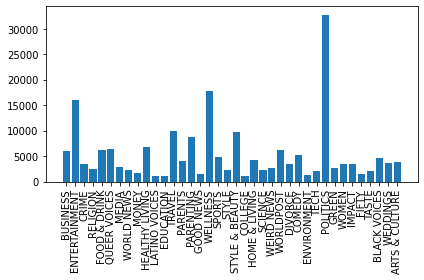

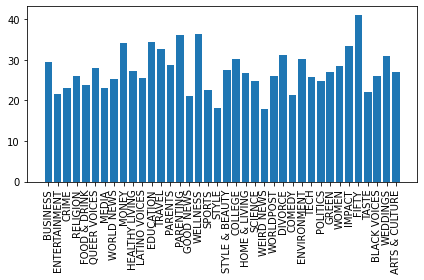

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

if not os.path.isdir('new_data_figs'):
    os.mkdir('new_data_figs')
    

path = os.getcwd()
folder = "new_data_figs"
FILE = "Number_of_articles_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

path = os.getcwd()
folder = "new_data_figs"
FILE = "Words_per_category.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(path_save)
plt.show()

In [4]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:2
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [5]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1]
    
    if len(sentences.split(" ")) >= 5:
    
        list_of_sentences.append(sentences)
        labels.append(label)
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



198123


In [6]:
label_list = list(category_news.keys())
index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

print(index_class_map_dict1)
label_values = list(index_class_map_dict1.values())

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'MONEY': 8, 'HEALTHY LIVING': 9, 'LATINO VOICES': 10, 'EDUCATION': 11, 'TRAVEL': 12, 'PARENTS': 13, 'PARENTING': 14, 'GOOD NEWS': 15, 'WELLNESS': 16, 'SPORTS': 17, 'STYLE': 18, 'STYLE & BEAUTY': 19, 'COLLEGE': 20, 'HOME & LIVING': 21, 'SCIENCE': 22, 'WEIRD NEWS': 23, 'WORLDPOST': 24, 'DIVORCE': 25, 'COMEDY': 26, 'ENVIRONMENT': 27, 'TECH': 28, 'POLITICS': 29, 'GREEN': 30, 'WOMEN': 31, 'IMPACT': 32, 'FIFTY': 33, 'TASTE': 34, 'BLACK VOICES': 35, 'WEDDINGS': 36, 'ARTS & CULTURE': 37}


In [7]:
number_labels=[]

for label in labels:
    number_labels.append(index_class_map_dict1[label])

In [8]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [9]:
from sklearn.model_selection import train_test_split

train_texts = list_of_sentences
train_labels = number_labels

train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2)


print(len(train_texts))
print(len(train_labels))
print(len(val_texts))

158498
158498
39625


In [10]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

train_encodings = tokenizer(train_texts, return_tensors='pt', truncation=True, padding=True)
val_encodings = tokenizer(val_texts, return_tensors='pt', truncation=True, padding=True)
print(train_encodings.keys())

dict_keys(['input_ids', 'attention_mask'])


In [11]:
from torch.nn import functional as F
class newsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = newsDataset(train_encodings, train_labels)
#print((train_dataset).__getitem__(3))
val_dataset = newsDataset(val_encodings, val_labels)


In [12]:
from torch.utils.data import DataLoader
from transformers import DistilBertModel, DistilBertConfig
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import DistilBertForSequenceClassification, AdamW
import torch.nn
from tqdm import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

device = torch.device('cuda:2') if torch.cuda.is_available() else torch.device('cpu')


class ModDistilBertForSequenceClassification(DistilBertForSequenceClassification):
    
    """Inherited to include a way to output intermediate preclassified output"""
    
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.distilbert = DistilBertModel(config)
        self.pre_classifier = nn.Linear(config.dim, config.dim)
        self.classifier = nn.Linear(config.dim, config.num_labels)
        self.dropout = nn.Dropout(config.seq_classif_dropout) #Original config.seq_classif_dropout, hardcoded for eval

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        r"""
        labels (:obj:`torch.LongTensor` of shape :obj:`(batch_size,)`, `optional`):
            Labels for computing the sequence classification/regression loss. Indices should be in :obj:`[0, ...,
            config.num_labels - 1]`. If :obj:`config.num_labels == 1` a regression loss is computed (Mean-Square loss),
            If :obj:`config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        distilbert_output = self.distilbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output1 = nn.ReLU()(pooled_output)  # (bs, dim)
        pooled_output1 = self.dropout(pooled_output1)  # (bs, dim)
        logits = self.classifier(pooled_output1)  # (bs, num_labels)

        loss = None
        if labels is not None:
            if self.num_labels == 1:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1), labels.view(-1))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        if not return_dict:
            output = (logits,) + distilbert_output[1:]
            return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=distilbert_output.hidden_states,
            attentions=distilbert_output.attentions,
        ),pooled_output






In [13]:
model = ModDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels = 38)
model.to(device)

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0001}
]
optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

#num_of_items_per_class = [7526, 15920, 3361, 2438, 8262, 6137, 2730, 8253, 28464, 1123, 2107, 9826, 12605, 1362, 4693, 11830, 2109, 2611, 3421, 5008, 2078, 32241, 3854, 3459, 3404, 1376, 4463, 3641, 3821]
num_of_items_per_class = [5827, 15920, 3361, 2438, 6195, 6137, 2730, 2177, 1699, 6524, 1123, 986, 9826, 3941, 8664, 1362, 17768, 4693, 2229, 9601, 1121, 4172, 2109, 2611, 6076, 3421, 5008, 1321, 2078, 32241, 2533, 3459, 3404, 1376, 2067, 4463, 3641, 3821]
weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
    
class_weights = torch.FloatTensor(weights).to(device)

train_losses = []
train_acc = []
val_losses = []
val_acc = []
running_loss = 0
running_acc = 0

path = os.getcwd()

folder = "new_bert_model1"
FILE = "model1.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

checkpoint = torch.load(path_save)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing ModDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ModDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ModDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bi

In [14]:
'''train_f1_score_macro = []
train_f1_score_raw = []


val_f1_score_macro = []
val_f1_score_raw = []


for epoch in tqdm(range(2)):
    
    model.train()
    
    pred_temp = 0
    true_temp = 0
    y_true = []
    y_pred = []
    
    
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
        loss = F.cross_entropy(outputs.logits, labels, class_weights)
        accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
        
        running_acc += accuracy.item()
        running_loss += loss.item()
        
        #predictions for f1 score
        pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
        true_temp = labels.cpu().detach().numpy()


        for item in pred_temp:
            y_pred.append(item)

        for item in true_temp:
            y_true.append(item)

        loss.backward()
        optimizer.step()
        
            
    
    print("train_loss for epoch = {epoch}".format(epoch = epoch + 1 ), "is", running_loss/len(train_loader))
    train_losses.append(running_loss/len(train_loader))
    running_loss = 0
    
    print("train_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(train_texts))
    train_acc.append(running_acc/len(train_texts))
    running_acc = 0
    
    f1score = f1_score(y_true, y_pred, average="macro")
    f1score_none = f1_score(y_true, y_pred, average=None)
    
    print("train_F1 macro score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score)
    print("F1 raw score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score_none)
    
    train_f1_score_macro.append(f1score)
    train_f1_score_raw.append(f1score_none)
    
    pred_temp = 0
    true_temp = 0
    y_true = []
    y_pred = []
    
    if epoch%1 == 0: 
        model.eval()
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
            loss = F.cross_entropy(outputs.logits, labels, class_weights)
            running_loss += loss.item()
            accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
            running_acc += accuracy.item()
            
            #predictions for f1 score
            pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
            true_temp = labels.cpu().detach().numpy()
            
            
            for item in pred_temp:
                y_pred.append(item)
            
            for item in true_temp:
                y_true.append(item)
                
                         
            
    print("val_loss for epoch = {epoch}".format(epoch = epoch + 1), "is", running_loss/len(val_loader))
    val_losses.append(running_loss/len(val_loader))
    running_loss = 0
    print("val_acc for epoch = {epoch}".format(epoch = epoch + 1), "is", running_acc/len(val_texts))
    val_acc.append(running_acc/len(val_texts))
    running_acc = 0
    
    f1score = f1_score(y_true, y_pred, average="macro")
    f1score_none = f1_score(y_true, y_pred, average=None)
    
    print("F1 macro score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score)
    print("F1 raw score for epoch = {epoch}".format(epoch = epoch + 1), "is", f1score_none)
    
    val_f1_score_macro.append(f1score)
    val_f1_score_raw.append(f1score_none)'''
                                

'train_f1_score_macro = []\ntrain_f1_score_raw = []\n\n\nval_f1_score_macro = []\nval_f1_score_raw = []\n\n\nfor epoch in tqdm(range(2)):\n    \n    model.train()\n    \n    pred_temp = 0\n    true_temp = 0\n    y_true = []\n    y_pred = []\n    \n    \n    for batch in train_loader:\n        optimizer.zero_grad()\n        input_ids = batch[\'input_ids\'].to(device)\n        attention_mask = batch[\'attention_mask\'].to(device)\n        labels = batch[\'labels\'].to(device)\n        \n        outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)\n        loss = F.cross_entropy(outputs.logits, labels, class_weights)\n        accuracy = (outputs.logits.argmax(-1) == labels).float().sum()\n        \n        running_acc += accuracy.item()\n        running_loss += loss.item()\n        \n        #predictions for f1 score\n        pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()\n        true_temp = labels.cpu().detach().numpy()\n\n\n        for item in pred_tem

In [15]:
'''import matplotlib.pyplot as plt
plt.switch_backend('agg')
import matplotlib.ticker as ticker
import numpy as np

epochs =[]

for i in range(9):
    epochs.append(i)

plt.figure(figsize=(10,10))
plt.plot(epochs, train_losses, linewidth=5)
plt.plot(epochs, val_losses, linewidth=5)
plt.legend(['train loss', 'val loss'], loc = 'upper right')

path = os.getcwd()
folder = "new_data_figs"
FILE = "loss-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, val_acc, linewidth =5)
plt.legend(['val_acc'], loc = 'upper right')

path = os.getcwd()
folder = "new_data_figs"
FILE = "acc-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)



plt.savefig(path_save)
plt.show()

plt.figure(figsize=(10,10))
plt.plot(epochs, train_f1_score_macro, linewidth =5)
plt.plot(epochs, val_f1_score_macro, linewidth =5)
plt.legend(['train_F1','val_F1'], loc = 'upper right')

path = os.getcwd()
folder = "new_data_figs"
FILE = "F1-bert.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

plt.savefig(path_save)
plt.show()


f = open("values1.txt",'w')
for i in range(len(epochs)):
    
    f.write("train_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_losses[i]) + "\n")
    f.write("train_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_acc[i]) + "\n")
    f.write("val_loss for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_losses[i]) + "\n")
    f.write("val_acc for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_acc[i]) + "\n")
    f.write("Training F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_f1_score_macro[i]) + "\n")
    f.write("Training F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(train_f1_score_raw[i]) + "\n")
    f.write("Validation F1 macro score for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_f1_score_macro[i]) + "\n")
    f.write("Validation F1 macro raw for epoch = {epoch}".format(epoch = epochs[i]+1) + " is " + str(val_f1_score_raw[i]) + "\n")
    f.write("\n""\n")
f.close()'''

'import matplotlib.pyplot as plt\nplt.switch_backend(\'agg\')\nimport matplotlib.ticker as ticker\nimport numpy as np\n\nepochs =[]\n\nfor i in range(9):\n    epochs.append(i)\n\nplt.figure(figsize=(10,10))\nplt.plot(epochs, train_losses, linewidth=5)\nplt.plot(epochs, val_losses, linewidth=5)\nplt.legend([\'train loss\', \'val loss\'], loc = \'upper right\')\n\npath = os.getcwd()\nfolder = "new_data_figs"\nFILE = "loss-bert.png"\n\npath_save = os.path.join(path, folder)\npath_save = os.path.join(path_save, FILE)\n\nplt.savefig(path_save)\nplt.show()\n\nplt.figure(figsize=(10,10))\nplt.plot(epochs, val_acc, linewidth =5)\nplt.legend([\'val_acc\'], loc = \'upper right\')\n\npath = os.getcwd()\nfolder = "new_data_figs"\nFILE = "acc-bert.png"\n\npath_save = os.path.join(path, folder)\npath_save = os.path.join(path_save, FILE)\n\n\n\nplt.savefig(path_save)\nplt.show()\n\nplt.figure(figsize=(10,10))\nplt.plot(epochs, train_f1_score_macro, linewidth =5)\nplt.plot(epochs, val_f1_score_macro, 

In [16]:
'''import os
import shutil

path = os.getcwd()

#shutil.rmtree("new_bert_model2")
os.mkdir("new_bert_model2")

folder = "new_bert_model2"
FILE = "model2.pth"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss
            }, path_save)'''

'import os\nimport shutil\n\npath = os.getcwd()\n\n#shutil.rmtree("new_bert_model2")\nos.mkdir("new_bert_model2")\n\nfolder = "new_bert_model2"\nFILE = "model2.pth"\n\npath_save = os.path.join(path, folder)\npath_save = os.path.join(path_save, FILE)\n\ntorch.save({\n            \'epoch\': epoch,\n            \'model_state_dict\': model.state_dict(),\n            \'optimizer_state_dict\': optimizer.state_dict(),\n            \'loss\': loss\n            }, path_save)'

In [17]:

f1_score_macro = []
f1_score_raw = []
pre_outputs_states = []

pred_temp = 0
true_temp = 0
y_true = []
y_pred = []

all_actual_targets = []
all_top_three_preds = []

model.eval()

for idx, batch in enumerate(val_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    loss = F.cross_entropy(outputs.logits, labels, class_weights)
    running_loss += loss.item()
    
    # Top three predictions for MRR calculation
    values, indices = torch.topk(outputs.logits , 3)
    
    top_three_preds = indices.cpu().detach().numpy()
    actual_targets = labels.cpu().detach().numpy()
    
    for item1 in top_three_preds:
        all_top_three_preds.append(item1)
        
    for item2 in actual_targets:
        all_actual_targets.append(item2)
    
    accuracy = (outputs.logits.argmax(-1) == labels).float().sum()
    running_acc += accuracy.item()

    # predictions for f1 score
    pred_temp = outputs.logits.argmax(-1).cpu().detach().numpy()
    true_temp = labels.cpu().detach().numpy()
        
    for item in pred_temp:
        y_pred.append(item)

    for item in true_temp:
        y_true.append(item)
                

In [18]:
ranks = [] 

for value in range(len(all_actual_targets)):
    if all_actual_targets[value] == all_top_three_preds[value][0]:
        ranks.append(1)
    elif all_actual_targets[value] == all_top_three_preds[value][1]:
        ranks.append(2)
    elif all_actual_targets[value] == all_top_three_preds[value][2]:
        ranks.append(3)
    else:
        ranks.append(0)

def meanReciprocalRank(arrayOfRanks):
    _sum = 0
    for i in arrayOfRanks:
        
        if i != 0:
            _sum += 1/i
        else:
            _sum += i
            
    return _sum/len(arrayOfRanks)


def accuracy(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i]:
            count +=1
            
    return count/len(predicted)


def accuracyTop3(predicted, target):
    count = 0
    for i in range(len(predicted)):
        
        if predicted[i][0] == target[i] or predicted[i][1] == target[i] or predicted[i][2] == target[i]:
            count +=1
            
    return count/len(predicted)
        

In [41]:
print("val_loss for epoch = {epoch}".format(epoch = epoch), "is", running_loss/len(val_loader))
val_losses.append(running_loss/len(val_loader))
running_loss = 0
print("val_acc for epoch = {epoch}".format(epoch = epoch), "is", running_acc/len(val_texts))
val_acc.append(running_acc/len(val_texts))
running_acc = 0



print("Accuracy for top prediction is :", accuracy(all_top_three_preds, all_actual_targets))
print("Accuracy for top 3 predictions is :", accuracyTop3(all_top_three_preds, all_actual_targets))
print("Mean Reciprocal Rank for top 3 predictions is :" , meanReciprocalRank(ranks))


f1score = f1_score(y_true, y_pred, average="macro")
f1score_none = f1_score(y_true, y_pred, average=None)

print("F1 macro score for epoch = {epoch}".format(epoch = epoch), "is", f1score)
print("F1 raw score for epoch = {epoch}".format(epoch = epoch), "is", f1score_none)

f1_score_macro.append(f1score)
f1_score_raw.append(f1score_none)

val_loss for epoch = 8 is 0.0
val_acc for epoch = 8 is 0.0
Accuracy for top prediction is : 0.6567318611987382
Accuracy for top 3 predictions is : 0.877577287066246
Mean Reciprocal Rank for top 3 predictions is : 0.7574342797055494
F1 macro score for epoch = 8 is 0.5920890628324044
F1 raw score for epoch = 8 is [0.56302187 0.75404683 0.63172043 0.61928934 0.75263775 0.72410866
 0.57165992 0.45117845 0.52941176 0.45013397 0.53777778 0.48039216
 0.81718708 0.470722   0.60897232 0.3880597  0.68595041 0.76652452
 0.57894737 0.84397163 0.47920792 0.81334114 0.59412405 0.42390289
 0.5924421  0.79261364 0.56700481 0.54198473 0.57109827 0.77028886
 0.46267432 0.37631579 0.4239905  0.45070423 0.45700246 0.51052967
 0.82819986 0.61824521]


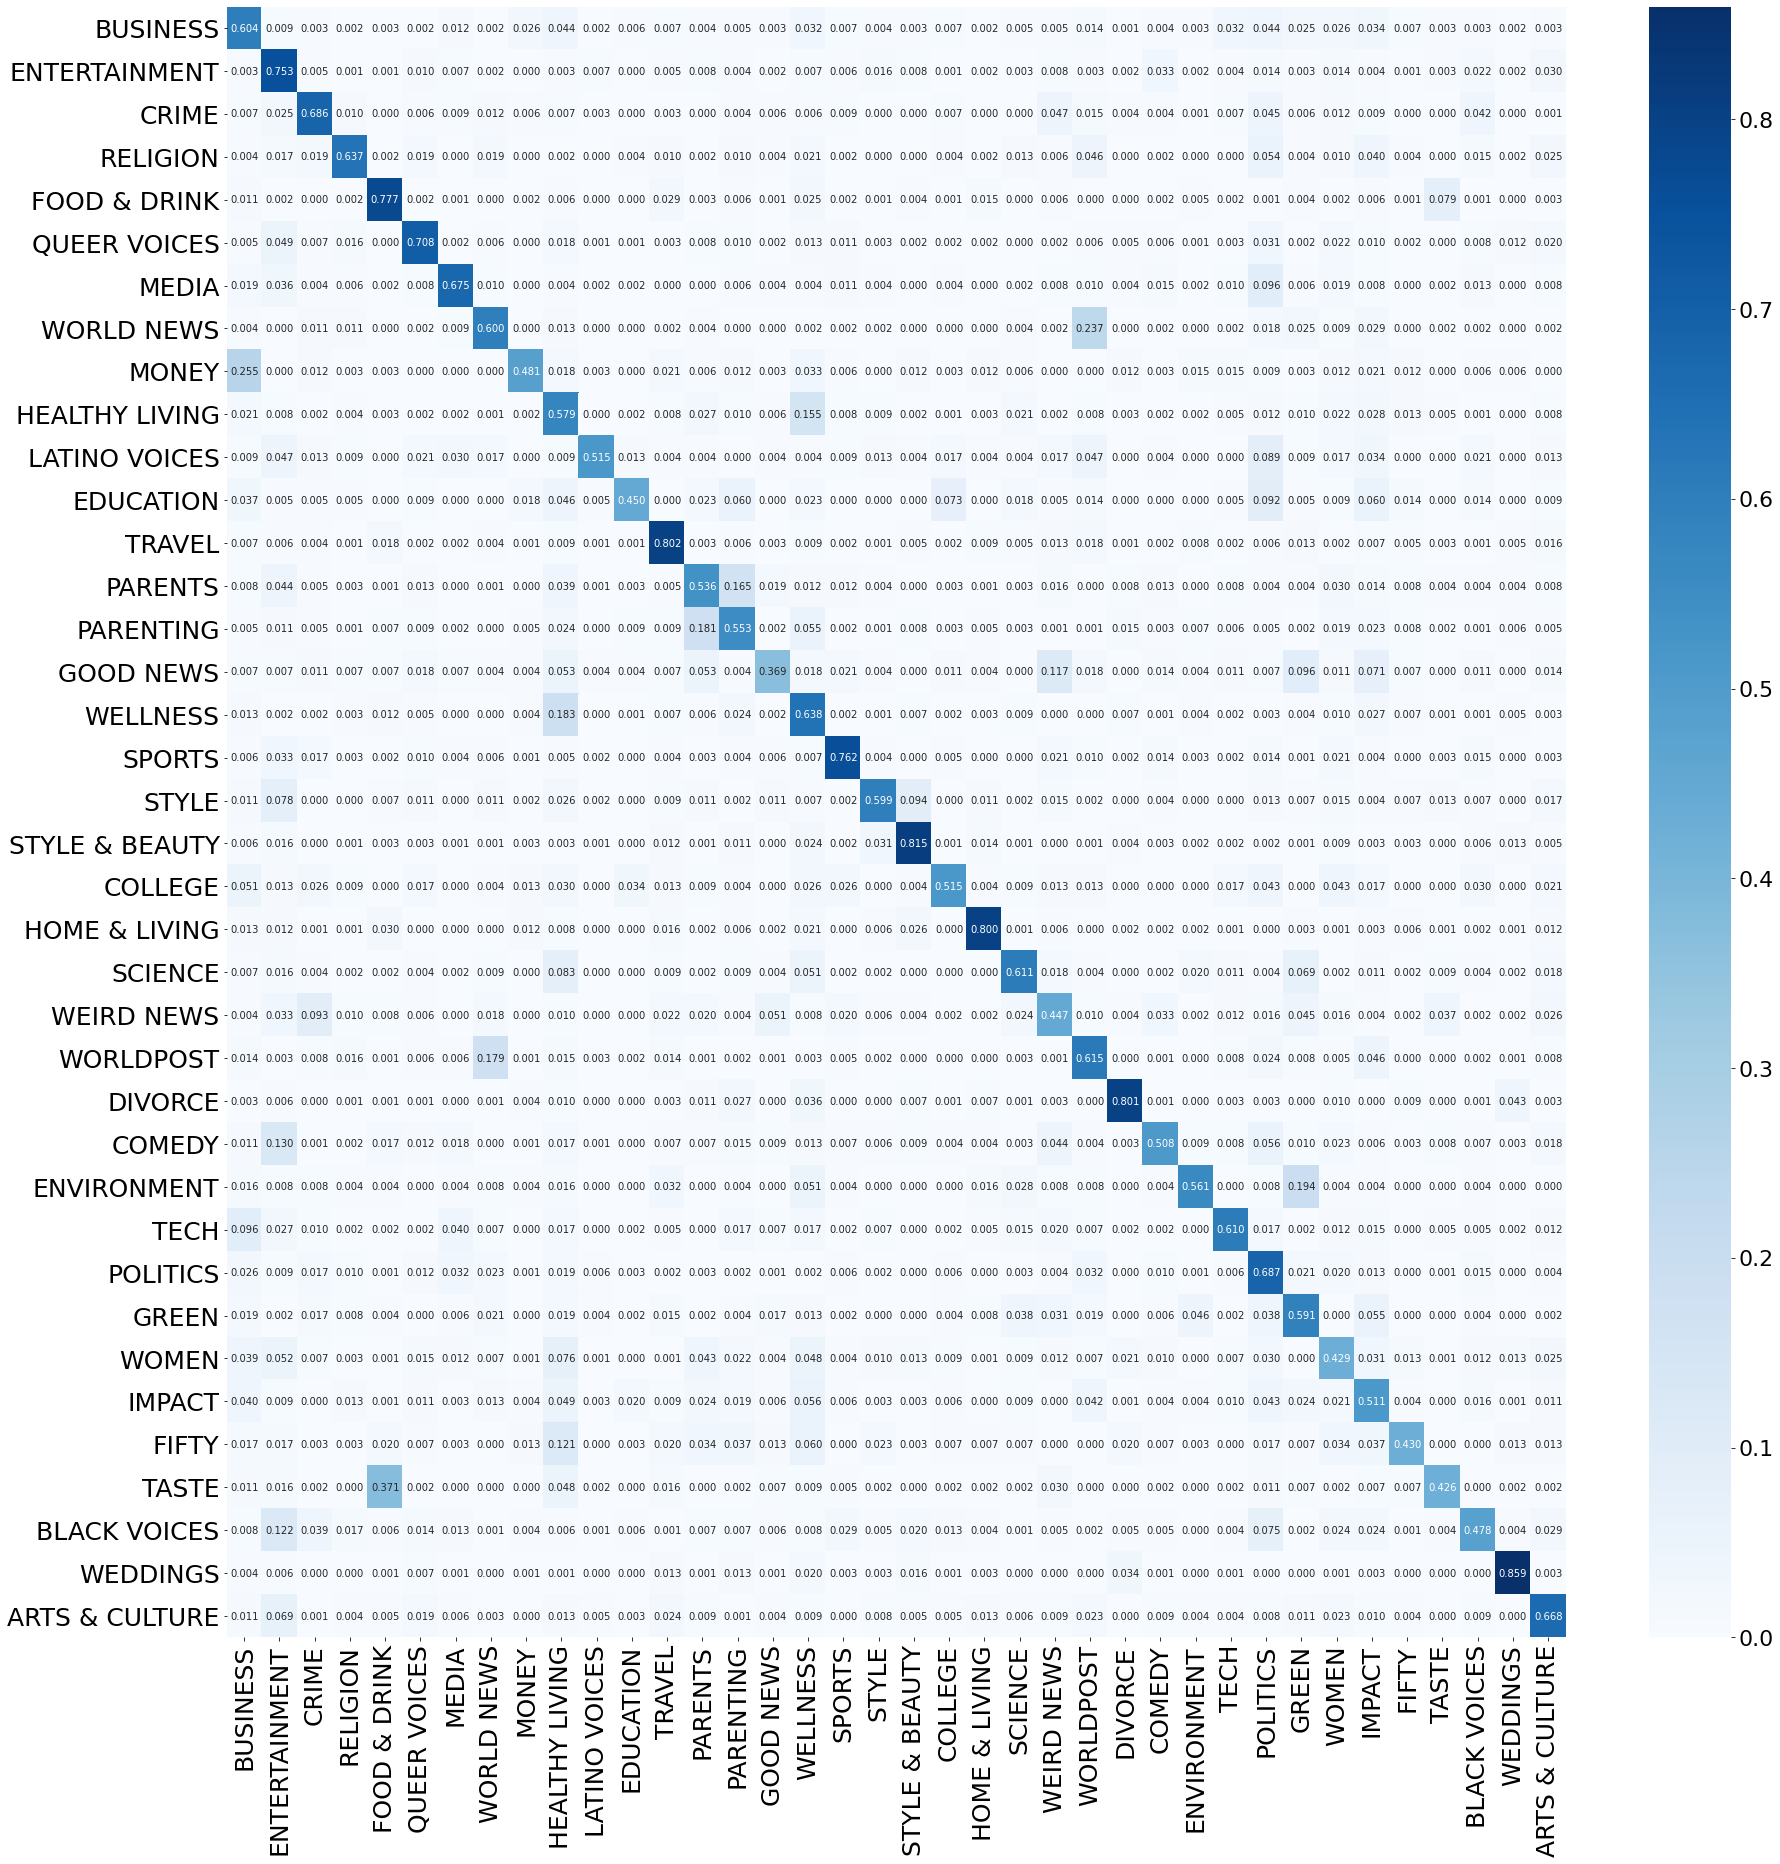

In [44]:
c_matrix = confusion_matrix(y_true, y_pred, labels=label_values, normalize = "true")

import pandas as pd
import seaborn as sns
from pylab import savefig

df_cm = pd.DataFrame(c_matrix, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='.3f')

matrix.set_yticklabels(matrix.get_ymajorticklabels(), fontsize = 25)
matrix.set_xticklabels(matrix.get_xmajorticklabels(), fontsize = 25)
cbar = matrix.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

path = os.getcwd()
folder = "new_data_figs"
FILE = "confusion_matrix_unweighted.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)



In [21]:
all_texts = list_of_sentences
all_labels = number_labels

all_encodings = tokenizer(all_texts, return_tensors='pt', truncation=True, padding=True)


class classHierDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: (val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

full_dataset = classHierDataset(all_encodings, all_labels)
full_dataset_loader = DataLoader(full_dataset, batch_size=16, shuffle=True)


In [22]:
pre_outputs_states = []
all_labels = []

model.eval()

for idx, batch in enumerate(full_dataset_loader):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    outputs, feat_for_tsne = model(input_ids, attention_mask=attention_mask)
    pre_classified = feat_for_tsne.cpu().detach().numpy()
    
    #for tsne predictions 
    for item in pre_classified:
        pre_outputs_states.append(item)
        
    # ground truth labels
    for item in labels:
        all_labels.append(item)

In [23]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components = 2, perplexity = 40, n_jobs = -1, random_state = 0).fit_transform(pre_outputs_states)
print(X_embedded.shape)

(198123, 2)


In [29]:
import pandas as pd

label_list = list(category_news.keys())
index_class_map_dict={}

index_class_map_dict1={}

for idx, value in enumerate(label_list):
    index_class_map_dict1[value]=idx

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value
    
#target_labels = np.array([tensor.cpu().numpy() for tensor in all_labels])

In [30]:
import numpy as np
from scipy.special import rel_entr
from scipy.stats import wasserstein_distance
from pyemd import emd
from scipy.spatial.distance import jensenshannon
import seaborn as sns
from pylab import savefig

df = pd.read_csv('tSNE_new_2epoch.csv')

In [31]:
'''df = pd.DataFrame({'X': X_embedded[:, 0], 'Y': X_embedded[:, 1], 'Label': target_labels})
df.to_csv('tSNE_new_2epoch.csv', index=False)'''
print(df.head())

           X          Y  Label
0  27.264938  16.084732     14
1  15.348776  28.862665     29
2  13.371457  36.011627     29
3  17.661879 -23.226955      4
4  20.285732   0.404500     12


In [32]:
from pathlib import Path

save_dir = Path("class_new-tSNE")
if not save_dir.exists():
    save_dir.mkdir()

hists = []
hist_range = [[df['X'].min(), df['X'].max()], [df['Y'].min(), df['Y'].max()]]
bins = 45
for i in range(38):
    masked = df[df['Label'] == i]
    fig = plt.figure(figsize=(15,15))
    name = index_class_map_dict[i]
    plt.title(name, size = 40)
    plt.xticks(size = 40)
    plt.yticks(size = 40)
    plt.scatter(masked['X'], masked['Y'], 7)
    path_save = save_dir / f"{name}.png"
    fig.savefig(path_save)
    plt.close()
    
    curr_hist = np.histogram2d(masked['X'], masked['Y'], range=hist_range, bins=bins, normed=True)[0]
    hists.append(curr_hist.reshape(-1))
hists = np.array(hists)

In [33]:
kl_div = np.empty([38, 38], dtype=np.float64)
js_div = np.empty([38, 38], dtype=np.float64)
was_dist = np.empty([38, 38], dtype=np.float64)
eps = np.finfo(np.float64).eps
for i in range(38):
    for j in range(38):
        kl_div[i, j] = rel_entr(hists[i] + eps, hists[j] + eps).sum()
        js_div[i, j] = jensenshannon(hists[i] + eps, hists[j] + eps).sum()
        was_dist[i, j] = wasserstein_distance(hists[i] + eps, hists[j] + eps).sum()
        #was_dist[i, j] = wass_dist(class_items[i], class_items[j])

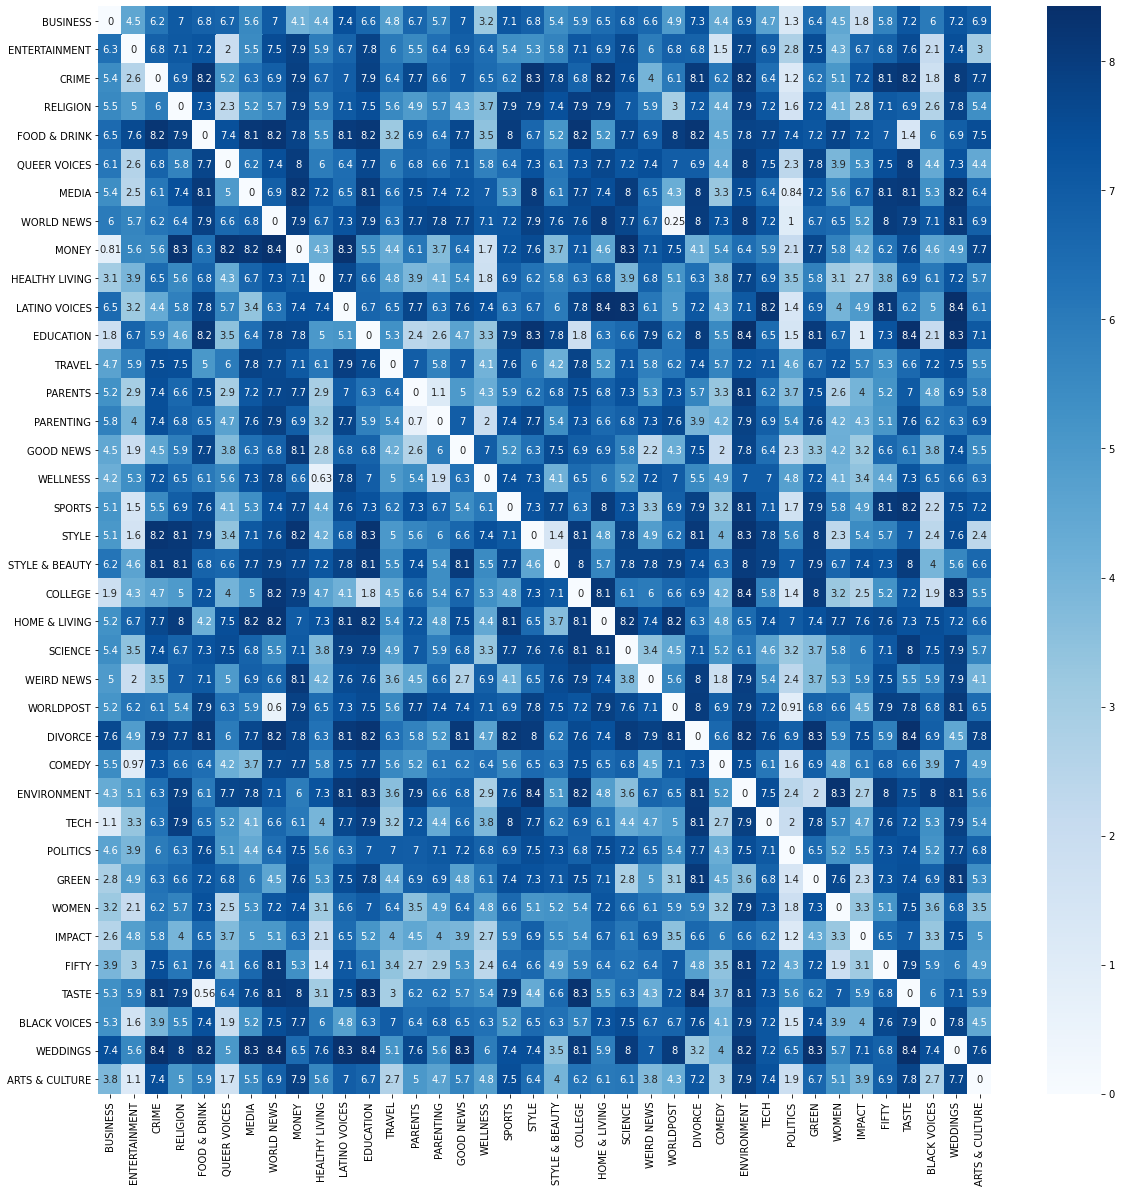

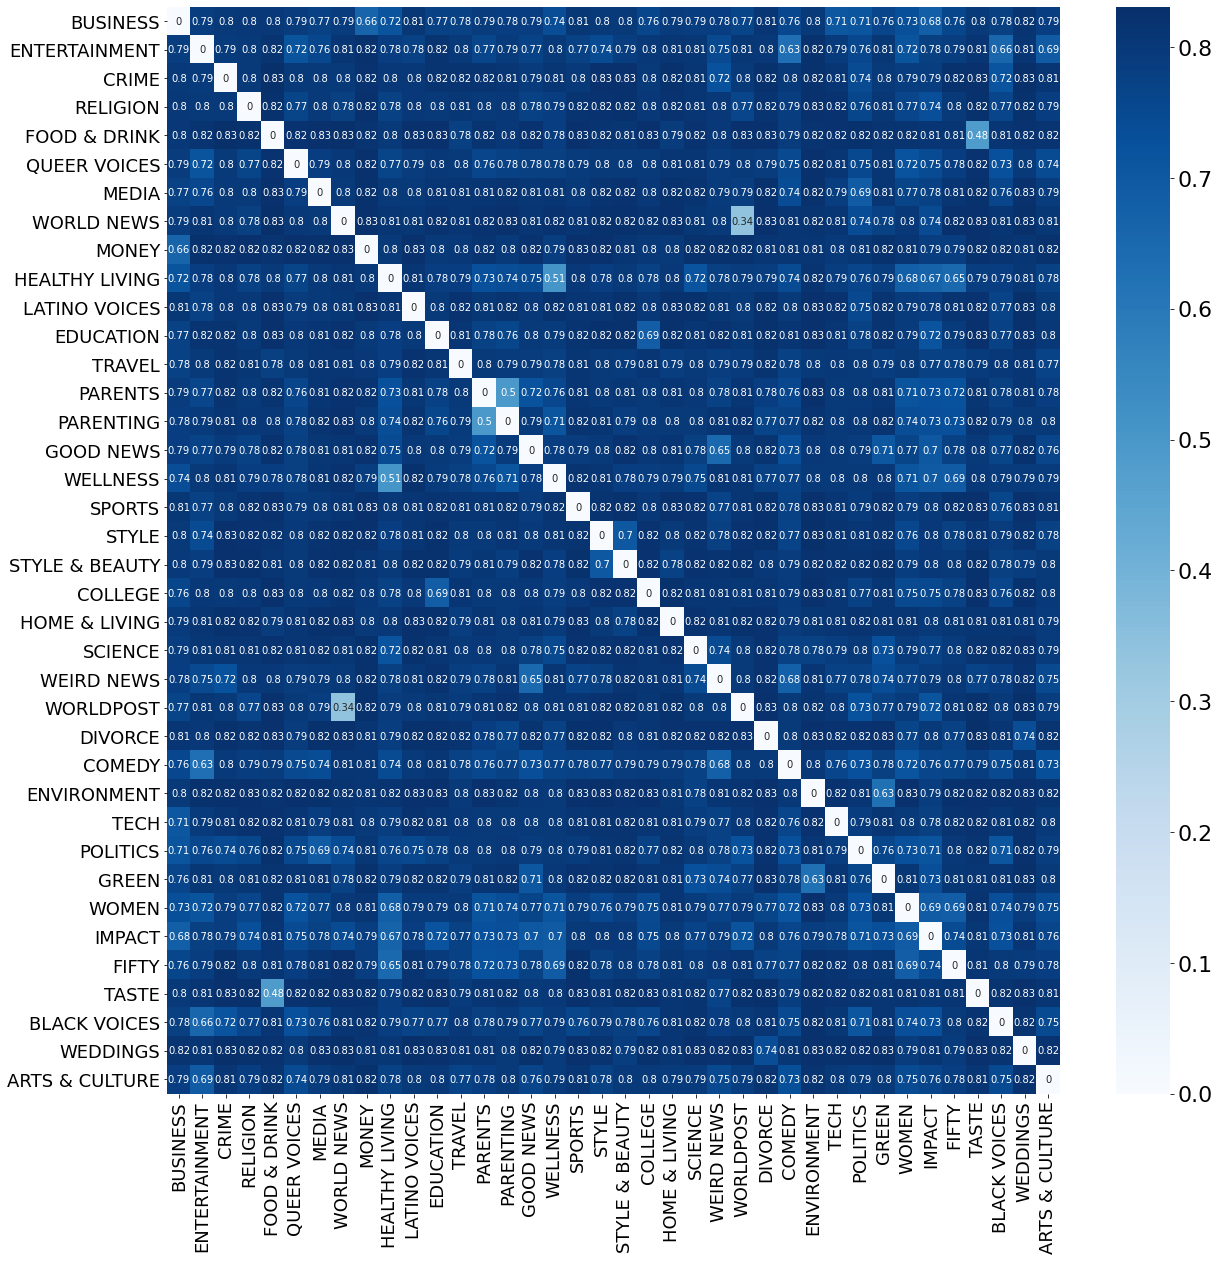

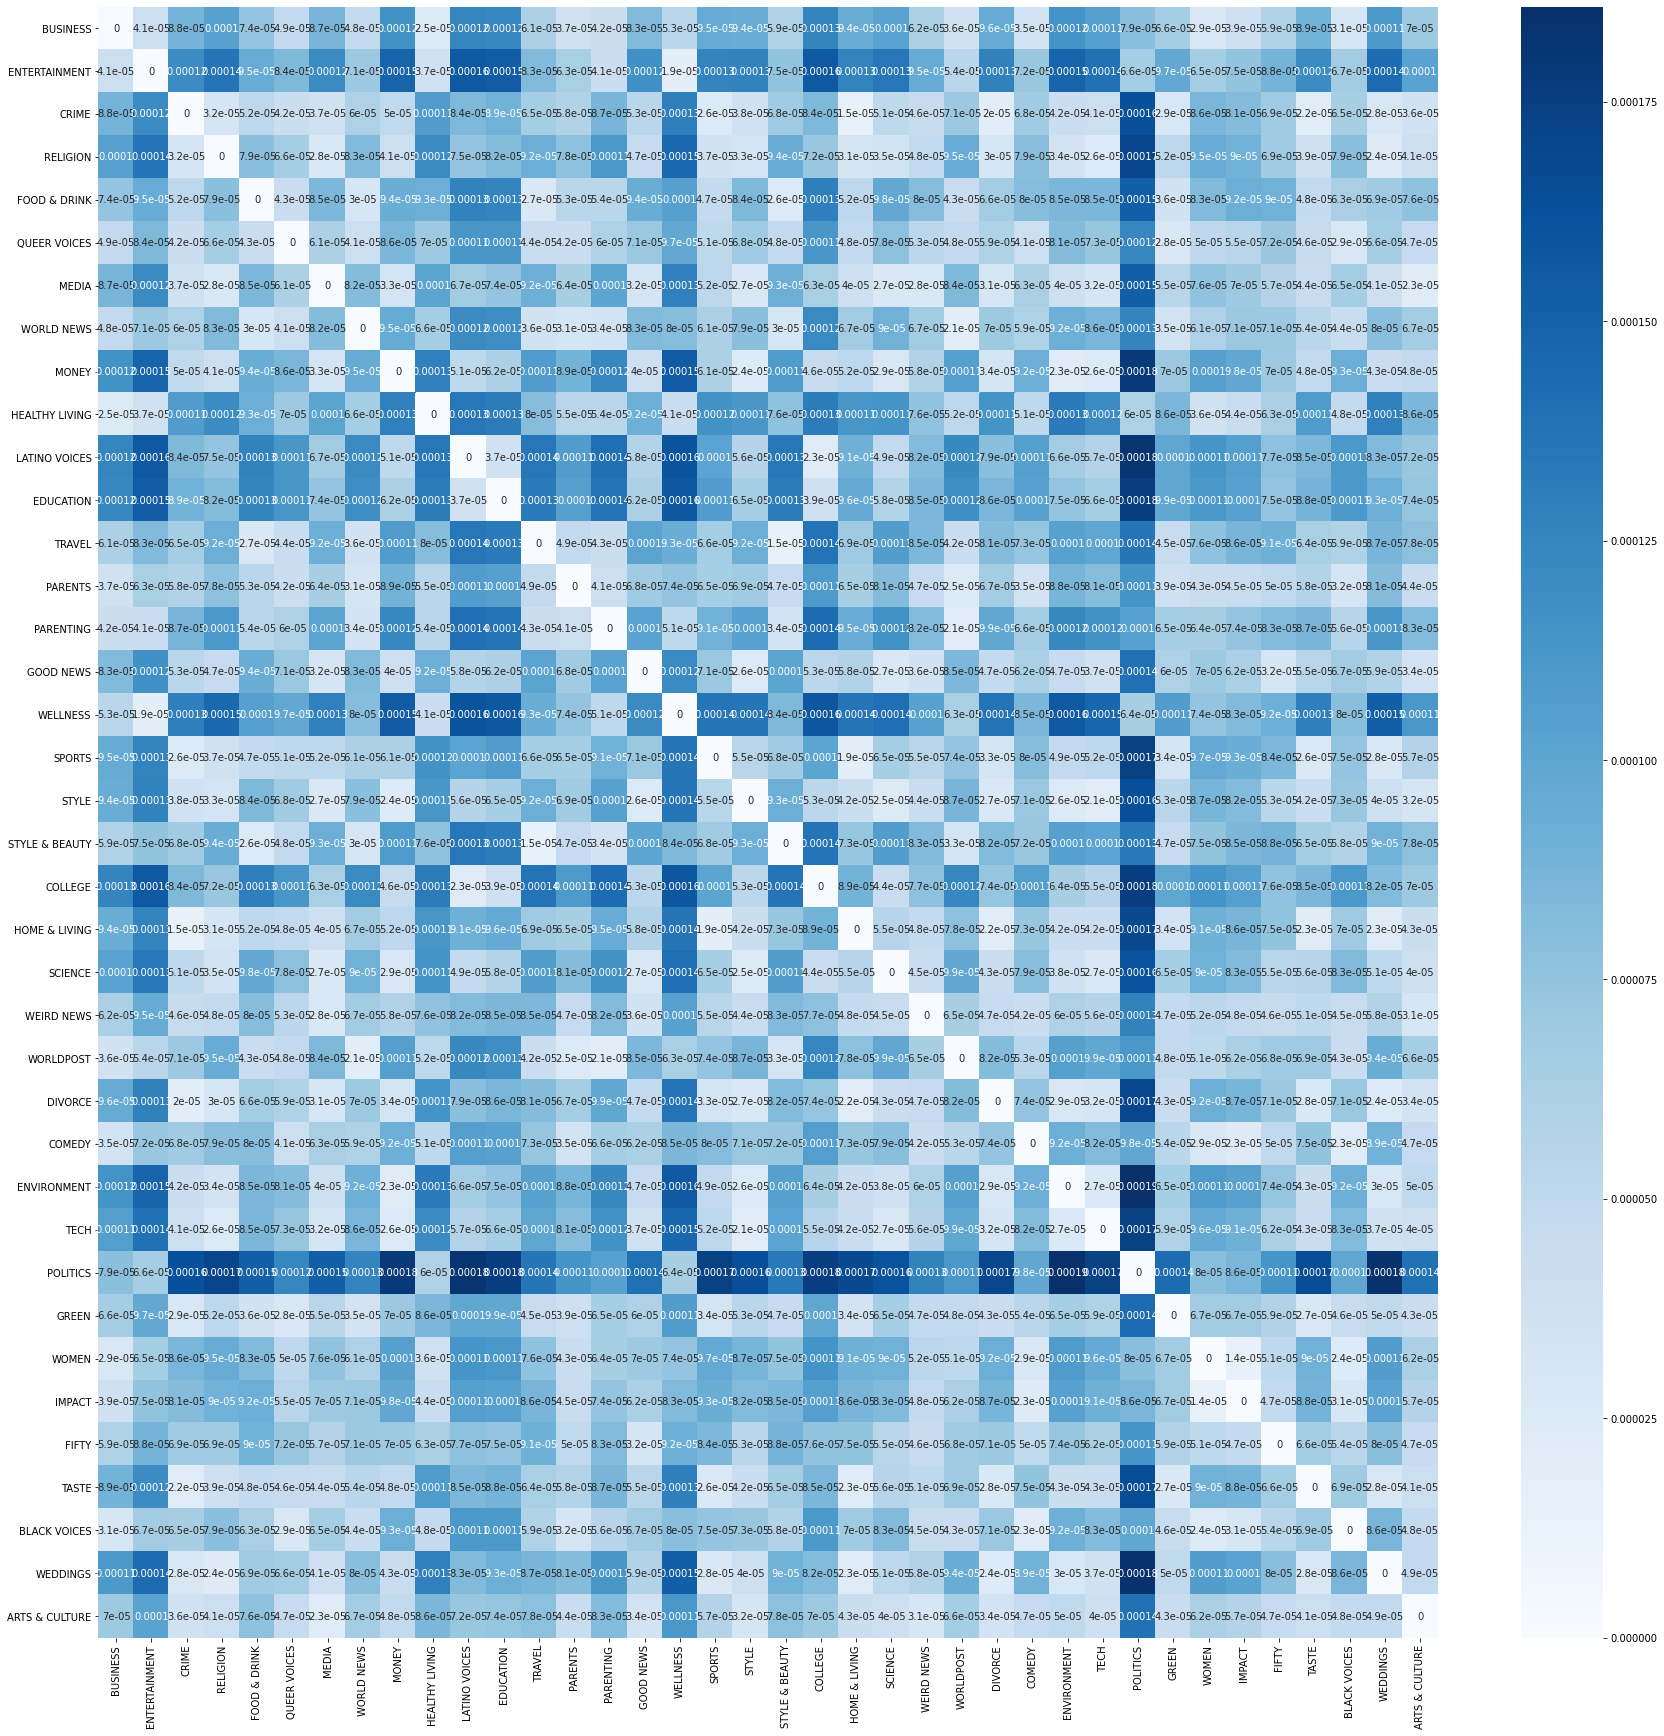

In [45]:
df_kl = pd.DataFrame(kl_div, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (20,20)
matrix = sns.heatmap(df_kl, annot=True, cmap='Blues')

path = os.getcwd()
folder = "new_data_figs"
FILE = "kldiv_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()

df_js = pd.DataFrame(js_div, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (20,20)
matrix = sns.heatmap(df_js, annot=True, cmap='Blues')
matrix.set_yticklabels(matrix.get_ymajorticklabels(), fontsize = 18)
matrix.set_xticklabels(matrix.get_xmajorticklabels(), fontsize = 18)
cbar = matrix.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)

path = os.getcwd()
folder = "new_data_figs"
FILE = "jsdiv_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()

df_was = pd.DataFrame(was_dist, index = label_list,columns = label_list)
plt.rcParams['figure.figsize'] = (30,30)
matrix = sns.heatmap(df_was, annot=True, cmap='Blues')


path = os.getcwd()
folder = "new_data_figs"
FILE = "wasdist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

figure = matrix.get_figure()    
figure.savefig(path_save)
plt.show()



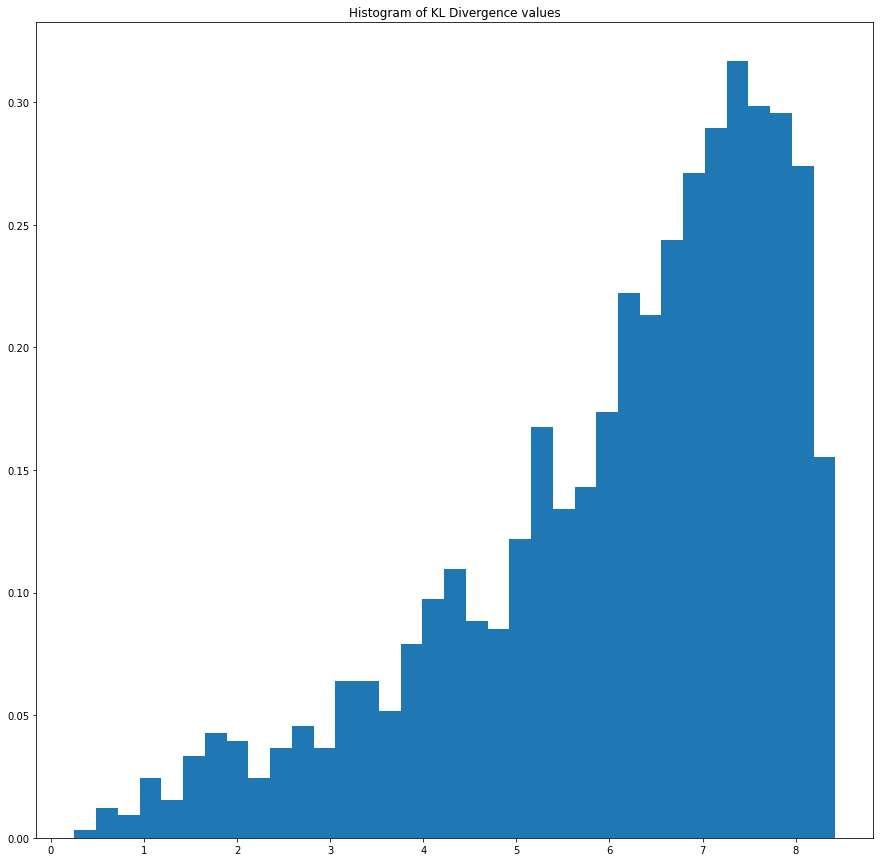

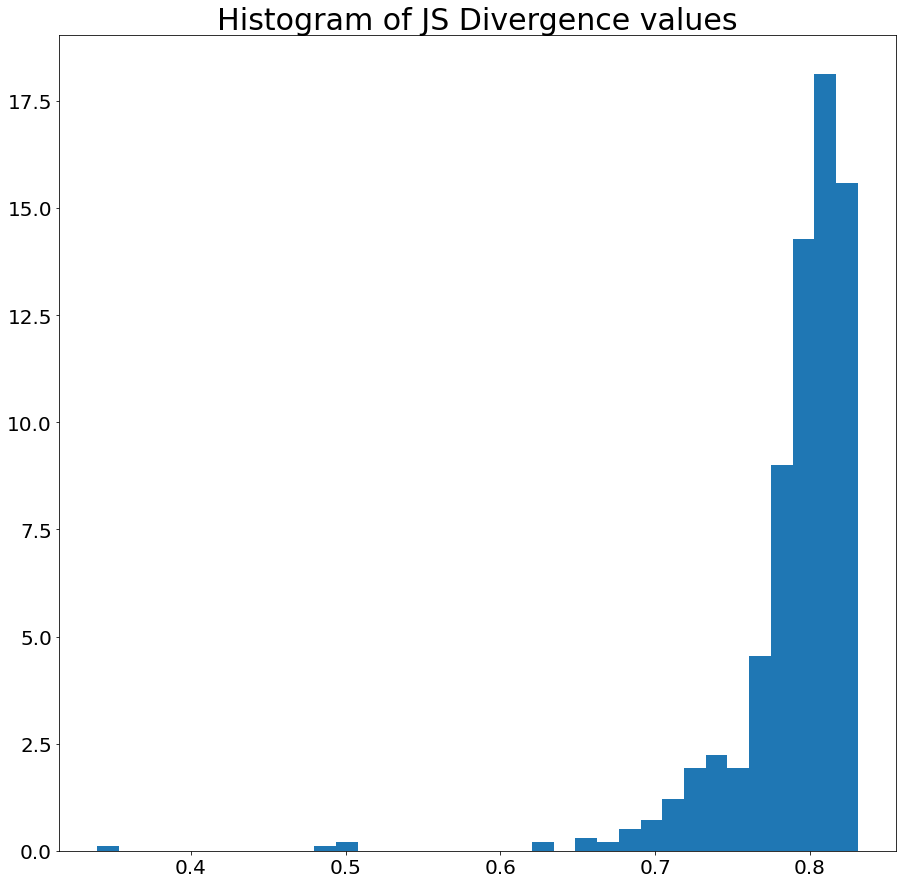

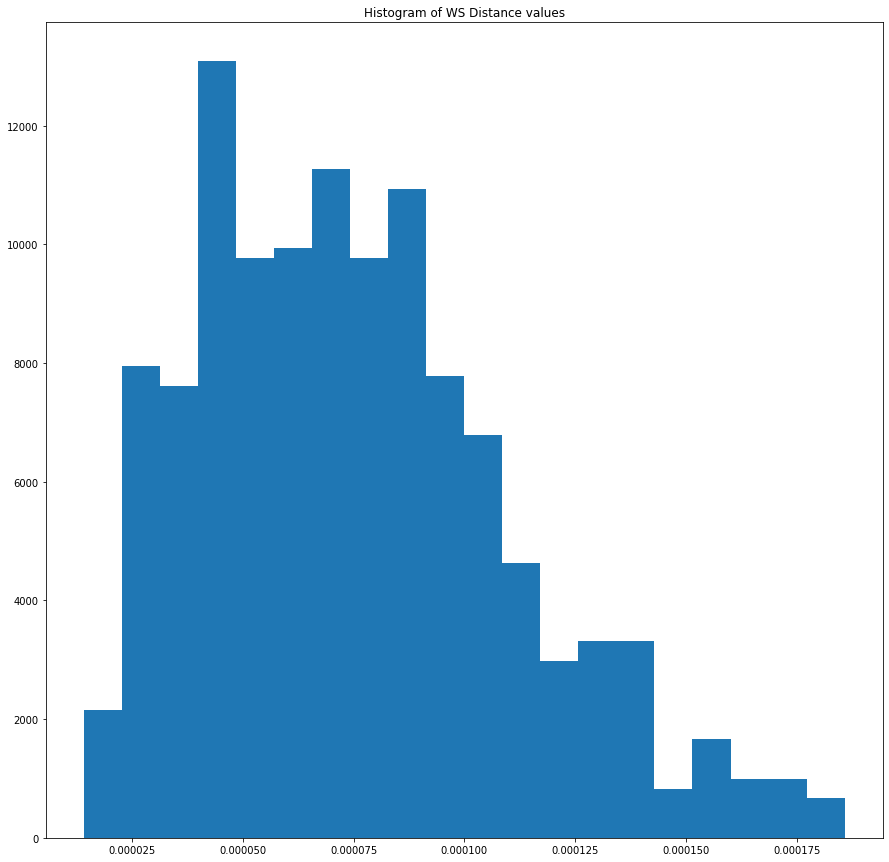

In [39]:
path = os.getcwd()
folder = "new_data_figs"
FILE = "kldiv_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
kl_div_new = [kl_div[i, j] for i in range(38) for j in range(38) if i!=j]
plt.hist(kl_div_new, bins=35, density=True)
plt.title("Histogram of KL Divergence values")
plt.savefig(path_save)

FILE = "jenshan_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
js_div_new = [js_div[i, j] for i in range(38) for j in range(38) if i!=j]
plt.hist(js_div_new, bins=35, density=True)
plt.title("Histogram of JS Divergence values",size = 30)

plt.xticks(size = 20)
plt.yticks(size = 20)
plt.savefig(path_save)

FILE = "was_dist_hist_full.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)

fig = plt.figure(figsize=(15,15))
was_dist_new = [was_dist[i, j] for i in range(38) for j in range(38) if i!=j]
plt.hist(was_dist_new, bins=20, density=True)
plt.title("Histogram of WS Distance values")
plt.savefig(path_save)

In [36]:
BASIC_MERGE_THRESH = 0.69
JS_THRESH = 0.70
COUNT_THRESH = 3

mask = (df_js <= BASIC_MERGE_THRESH) & (df_js > 0)
i, j = np.where(mask)
idxs = np.array([(ii, jj) for ii, jj in zip(i, j) if ii < jj])
to_merge = list(zip(df_js.index[idxs[:,0]], df_js.columns[idxs[:,1]]))

print("Possibly merge these classes :")
for c1, c2 in to_merge:
    print(f"  {c1} -- {c2}")

count_js = (df_js < JS_THRESH).sum() - 1
mask1 = count_js >= COUNT_THRESH
i = np.where(mask1)
to_drop = count_js.index[i]
print("Multiple overlap: Possibly drop these classes:")
for c in to_drop:
    print(f"  {c}")

Possibly merge these classes :
  BUSINESS -- MONEY
  BUSINESS -- IMPACT
  ENTERTAINMENT -- COMEDY
  ENTERTAINMENT -- BLACK VOICES
  FOOD & DRINK -- TASTE
  WORLD NEWS -- WORLDPOST
  HEALTHY LIVING -- WELLNESS
  HEALTHY LIVING -- WOMEN
  HEALTHY LIVING -- IMPACT
  HEALTHY LIVING -- FIFTY
  EDUCATION -- COLLEGE
  PARENTS -- PARENTING
  GOOD NEWS -- WEIRD NEWS
  WEIRD NEWS -- COMEDY
  ENVIRONMENT -- GREEN
  WOMEN -- FIFTY
Multiple overlap: Possibly drop these classes:
  ENTERTAINMENT
  HEALTHY LIVING
  WELLNESS
  WOMEN
  IMPACT
  FIFTY


In [47]:
from matplotlib.colors import ListedColormap
gen = np.random.default_rng(6)
rgb = gen.uniform(size=(38, 3))
gen.shuffle(rgb)
a = np.ones((38,1))
rgba = np.concatenate([rgb, a], 1)
cmap = ListedColormap(rgba)

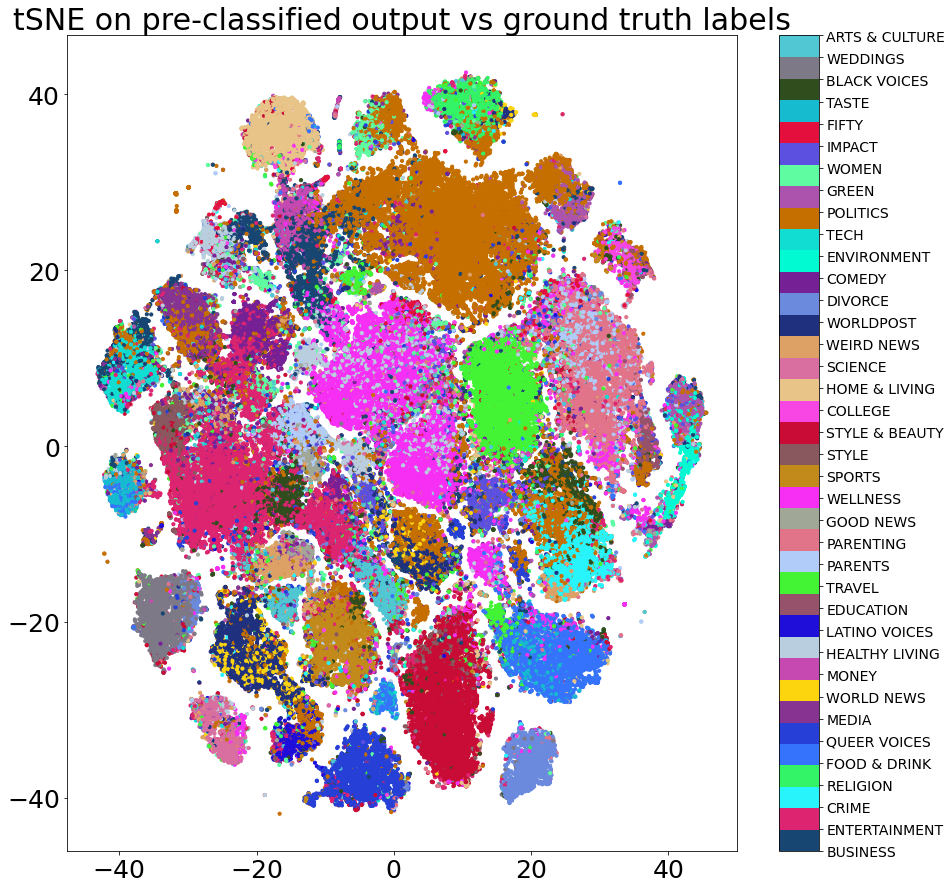

In [49]:
path = os.getcwd()

folder = "class_new-tSNE"
FILE = "clustered_tSNE.png"

path_save = os.path.join(path, folder)
path_save = os.path.join(path_save, FILE)


fig = plt.figure(figsize=(15,15))
#cmap = plt.get_cmap('Set3', 29)
out = plt.scatter(df['X'],df['Y'], 10, c = df['Label'], cmap=cmap)
cbar = plt.colorbar(out, ticks = np.arange(38))
cbar.set_ticklabels(list(index_class_map_dict1.keys()))
cbar.ax.tick_params(labelsize=14)
plt.title("tSNE on pre-classified output vs ground truth labels", size = 30)
plt.xticks(size = 25)
plt.yticks(size = 25)

file_name = path_save

#plt.savefig(file_name)
plt.show()

